In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing import image
from tqdm import tqdm
from PIL import Image
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


In [2]:
def returnClassIndex(trainY,class_index):
    labels = np.argmax(trainY, axis = 1)
    return [ i for i in range(len(labels)) if labels[i] == class_index]

def creatModelInstance(output):
    print("Creating Model....")
    conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    model = models.Sequential()
    inputs = tf.keras.layers.Input((32, 32, 3))
    x = layers.UpSampling2D((2,2))(inputs)
    x = layers.UpSampling2D((2,2))(x)
    x = layers.UpSampling2D((2,2))(x)
    x = conv_base(x)
    x = layers.Flatten()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(output, activation='softmax')(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")
    model.summary()
    return model 

In [3]:
model0 = creatModelInstance(5)

Creating Model....
Model: "cifar_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 64, 64, 3)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 128, 128, 3)       0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 256, 256, 3)       0         
_________________________________________________________________
resnet50 (Model)             (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1.0/255,
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)
trainX = trainX/255
testX =testX/255

In [5]:
def creatModelInstance2(output):
    print("Creating Model....")
    conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    model = models.Sequential()
    inputs = tf.keras.layers.Input((32, 32, 3))
    x = layers.UpSampling2D((2,2))(inputs)
    x = layers.UpSampling2D((2,2))(x)
    x = layers.UpSampling2D((2,2))(x)
    x = conv_base(x)
    x = layers.Flatten()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(output, activation='sigmoid')(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model")
    model.summary()
    return model 

In [7]:
true_train_class1 = [0,1,2,3,4]
true_train_class_idx1 = []
for i in true_train_class1:
    true_train_class_idx1 = true_train_class_idx1 + returnClassIndex(trainY,i)

### Selecting the classes
false_train_class = [5,6,7,8,9]
false_train_class_idx = []
for i in false_train_class:
    false_train_class_idx = false_train_class_idx + returnClassIndex(trainY,i)

true_test_class1 = [0,1,2,3,4]
true_test_class_idx1 = []
for i in true_test_class1:
    true_test_class_idx1 = true_test_class_idx1 + returnClassIndex(testY,i)

### Selecting the classes
false_test_class = [5,6,7,8,9]
false_test_class_idx = []
for i in false_test_class:
    false_test_class_idx = false_test_class_idx + returnClassIndex(testY,i)

trn_idx_shuffle = np.random.RandomState(seed= 42).permutation(len(trainY))
tst_idx_shuffle = np.random.RandomState(seed= 42).permutation(len(testY))

In [8]:
train_trueX = trainX[true_train_class_idx1]
train_falseX = trainX[false_train_class_idx]
bin_trainX = np.vstack([train_trueX, train_falseX])[trn_idx_shuffle]
bin_trainY = np.array((len(train_trueX)*[1]) + (len(train_falseX)*[0]))[trn_idx_shuffle]

test_trueX = testX[true_test_class_idx1]
test_falseX = testX[false_test_class_idx]
bin_testX = np.vstack([test_trueX, train_falseX])[tst_idx_shuffle]
bin_testY = np.array((len(test_trueX)*[1]) + (len(test_falseX)*[0]))[tst_idx_shuffle]

In [9]:
model2 = creatModelInstance2(1)

Creating Model....
Model: "cifar_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 64, 64, 3)         0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 128, 128, 3)       0         
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 256, 256, 3)       0         
_________________________________________________________________
resnet50 (Model)             (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 

In [12]:
batch_size = 16
model2.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', 
              metrics=['acc'])
history = model2.fit(bin_trainX,bin_trainY,
                     batch_size=batch_size, epochs=3, verbose = 1,
                     validation_data = (bin_testX,bin_testY)
                    )

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 1680s 34ms/sample - loss: 0.1095 - acc: 0.9648 - val_loss: 0.0938 - val_acc: 0.9697
Epoch 2/3
50000/50000 [==============================] - 1855s 37ms/sample - loss: 0.0984 - acc: 0.9696 - val_loss: 0.2025 - val_acc: 0.9367
Epoch 3/3
50000/50000 [==============================] - 1783s 36ms/sample - loss: 0.0876 - acc: 0.9737 - val_loss: 0.0661 - val_acc: 0.9773


In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='binary_classifier_model.png')


scores = model2.evaluate(bin_testX, bin_testY, verbose=1)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))


# Serialize model to JSON
model_json = model2.to_json()
with open("Models/binary_classifier_resnet_model1_cifar10.json", "w") as json_file:
    json_file.write(model_json)
# Serialize weights to HDF5
model2.save_weights("Models/binary_classifier_resnet_model1_cifar10.h5")
print("Saved model to disk")


10000/10000 [==============================] - 66s 7ms/sample - loss: 0.0661 - acc: 0.9773
acc: 97.73%
Saved model to disk


In [15]:
predictions = model2.predict(bin_testX, verbose = 1 )

10000/10000 [==============================] - 65s 6ms/sample


In [23]:
pred = predictions.round()
groundTruth = bin_testY

In [24]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import log_loss, roc_curve

f1 = f1_score(groundTruth, pred, average = "macro")
acc = accuracy_score(groundTruth, pred)
recall = recall_score(groundTruth, pred,   average = "macro")

precision =precision_score(groundTruth, pred, average = "macro")
loss = log_loss(groundTruth, pred)
print("Loss: {}".format(loss))
print("Accuracy: {}".format(acc))
print("F1 Score: {}".format(f1))
print("recall Score: {}".format(recall))
print("Precision Score: {}".format(precision))

Loss: nan
Accuracy: 0.9773
F1 Score: 0.9772964525707142
recall Score: 0.9773000000000001
Precision Score: 0.9775984990619138


c:\users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:2295: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
c:\users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:2295: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


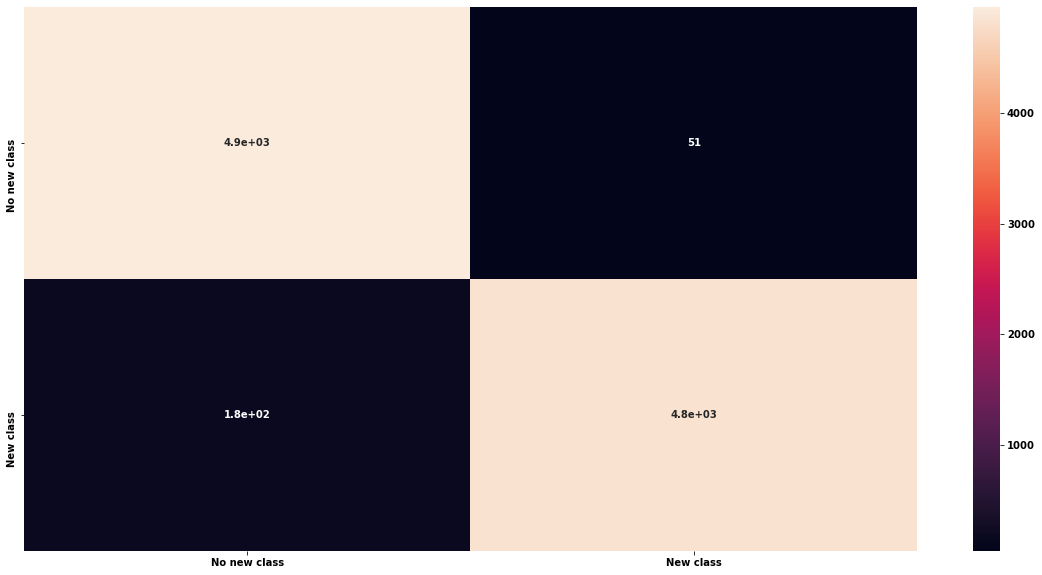

In [26]:
import matplotlib
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
conf = tf.math.confusion_matrix(groundTruth,pred)
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
labels_names = ['No new class','New class']
df_cm = pd.DataFrame(np.array(conf), index = labels_names,
                  columns =  labels_names)
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True)

c:\users\user\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


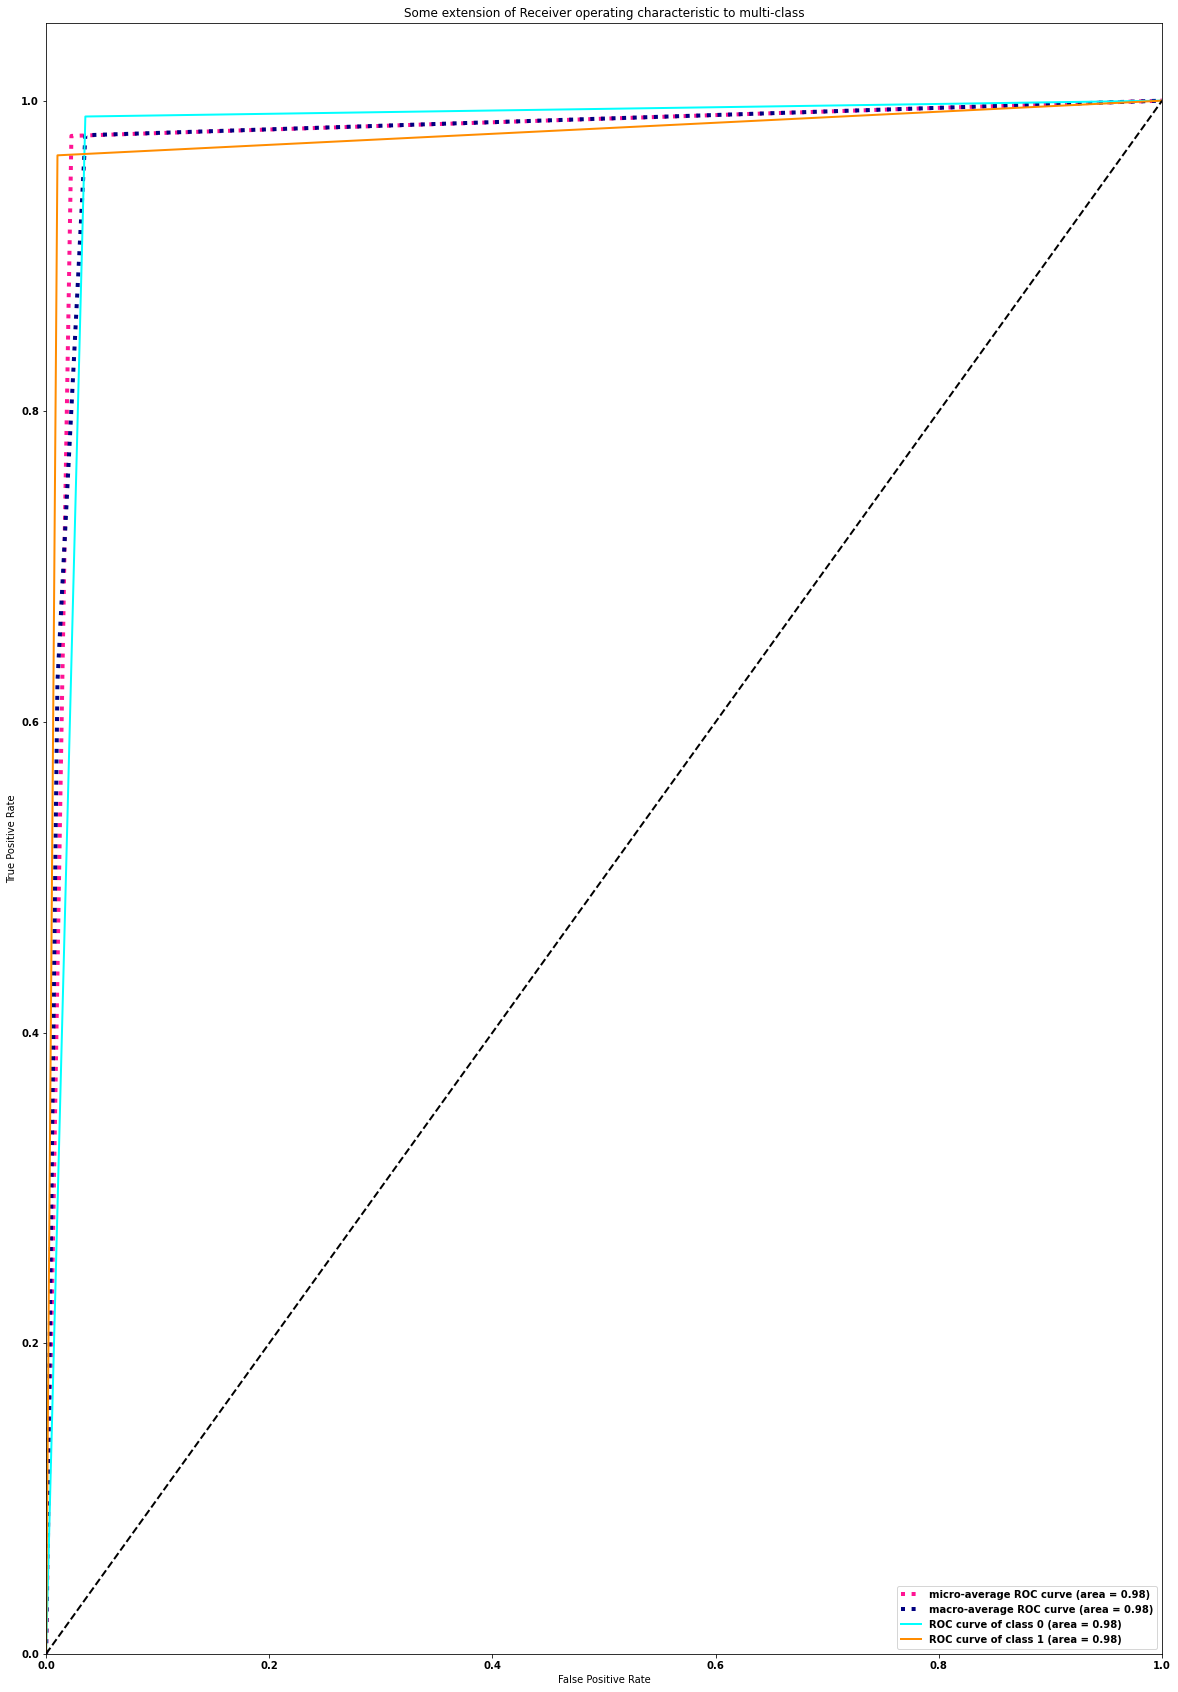

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
y_test = np.copy(tf.keras.utils.to_categorical(groundTruth))
y_score = np.copy(tf.keras.utils.to_categorical(pred))
n_classes =  2
lw =2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])



# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (20, 30))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [31]:
%matplotlib inline
def plot_class_predictions(preds,idx, classes):
    
    print("Class #{}".format(idx))
    c, f = np.unique(preds, return_counts = True)
    fig = plt.figure( figsize = (30,20))
    font = {'family' : 'sans',
            'weight' : 'bold',
            'size'   : 40}
    matplotlib.rc('font', **font)
    ax = fig.add_axes([0,0,1,1 ])
    ax.set_title("{} Predictions".format(classes[idx]))
    ax.set_xlabel("Clases")
    ax.set_ylabel("Frequecy Of Predictions")
    ax.set_xticks(c)
    ax.bar(c,f)

Class #0


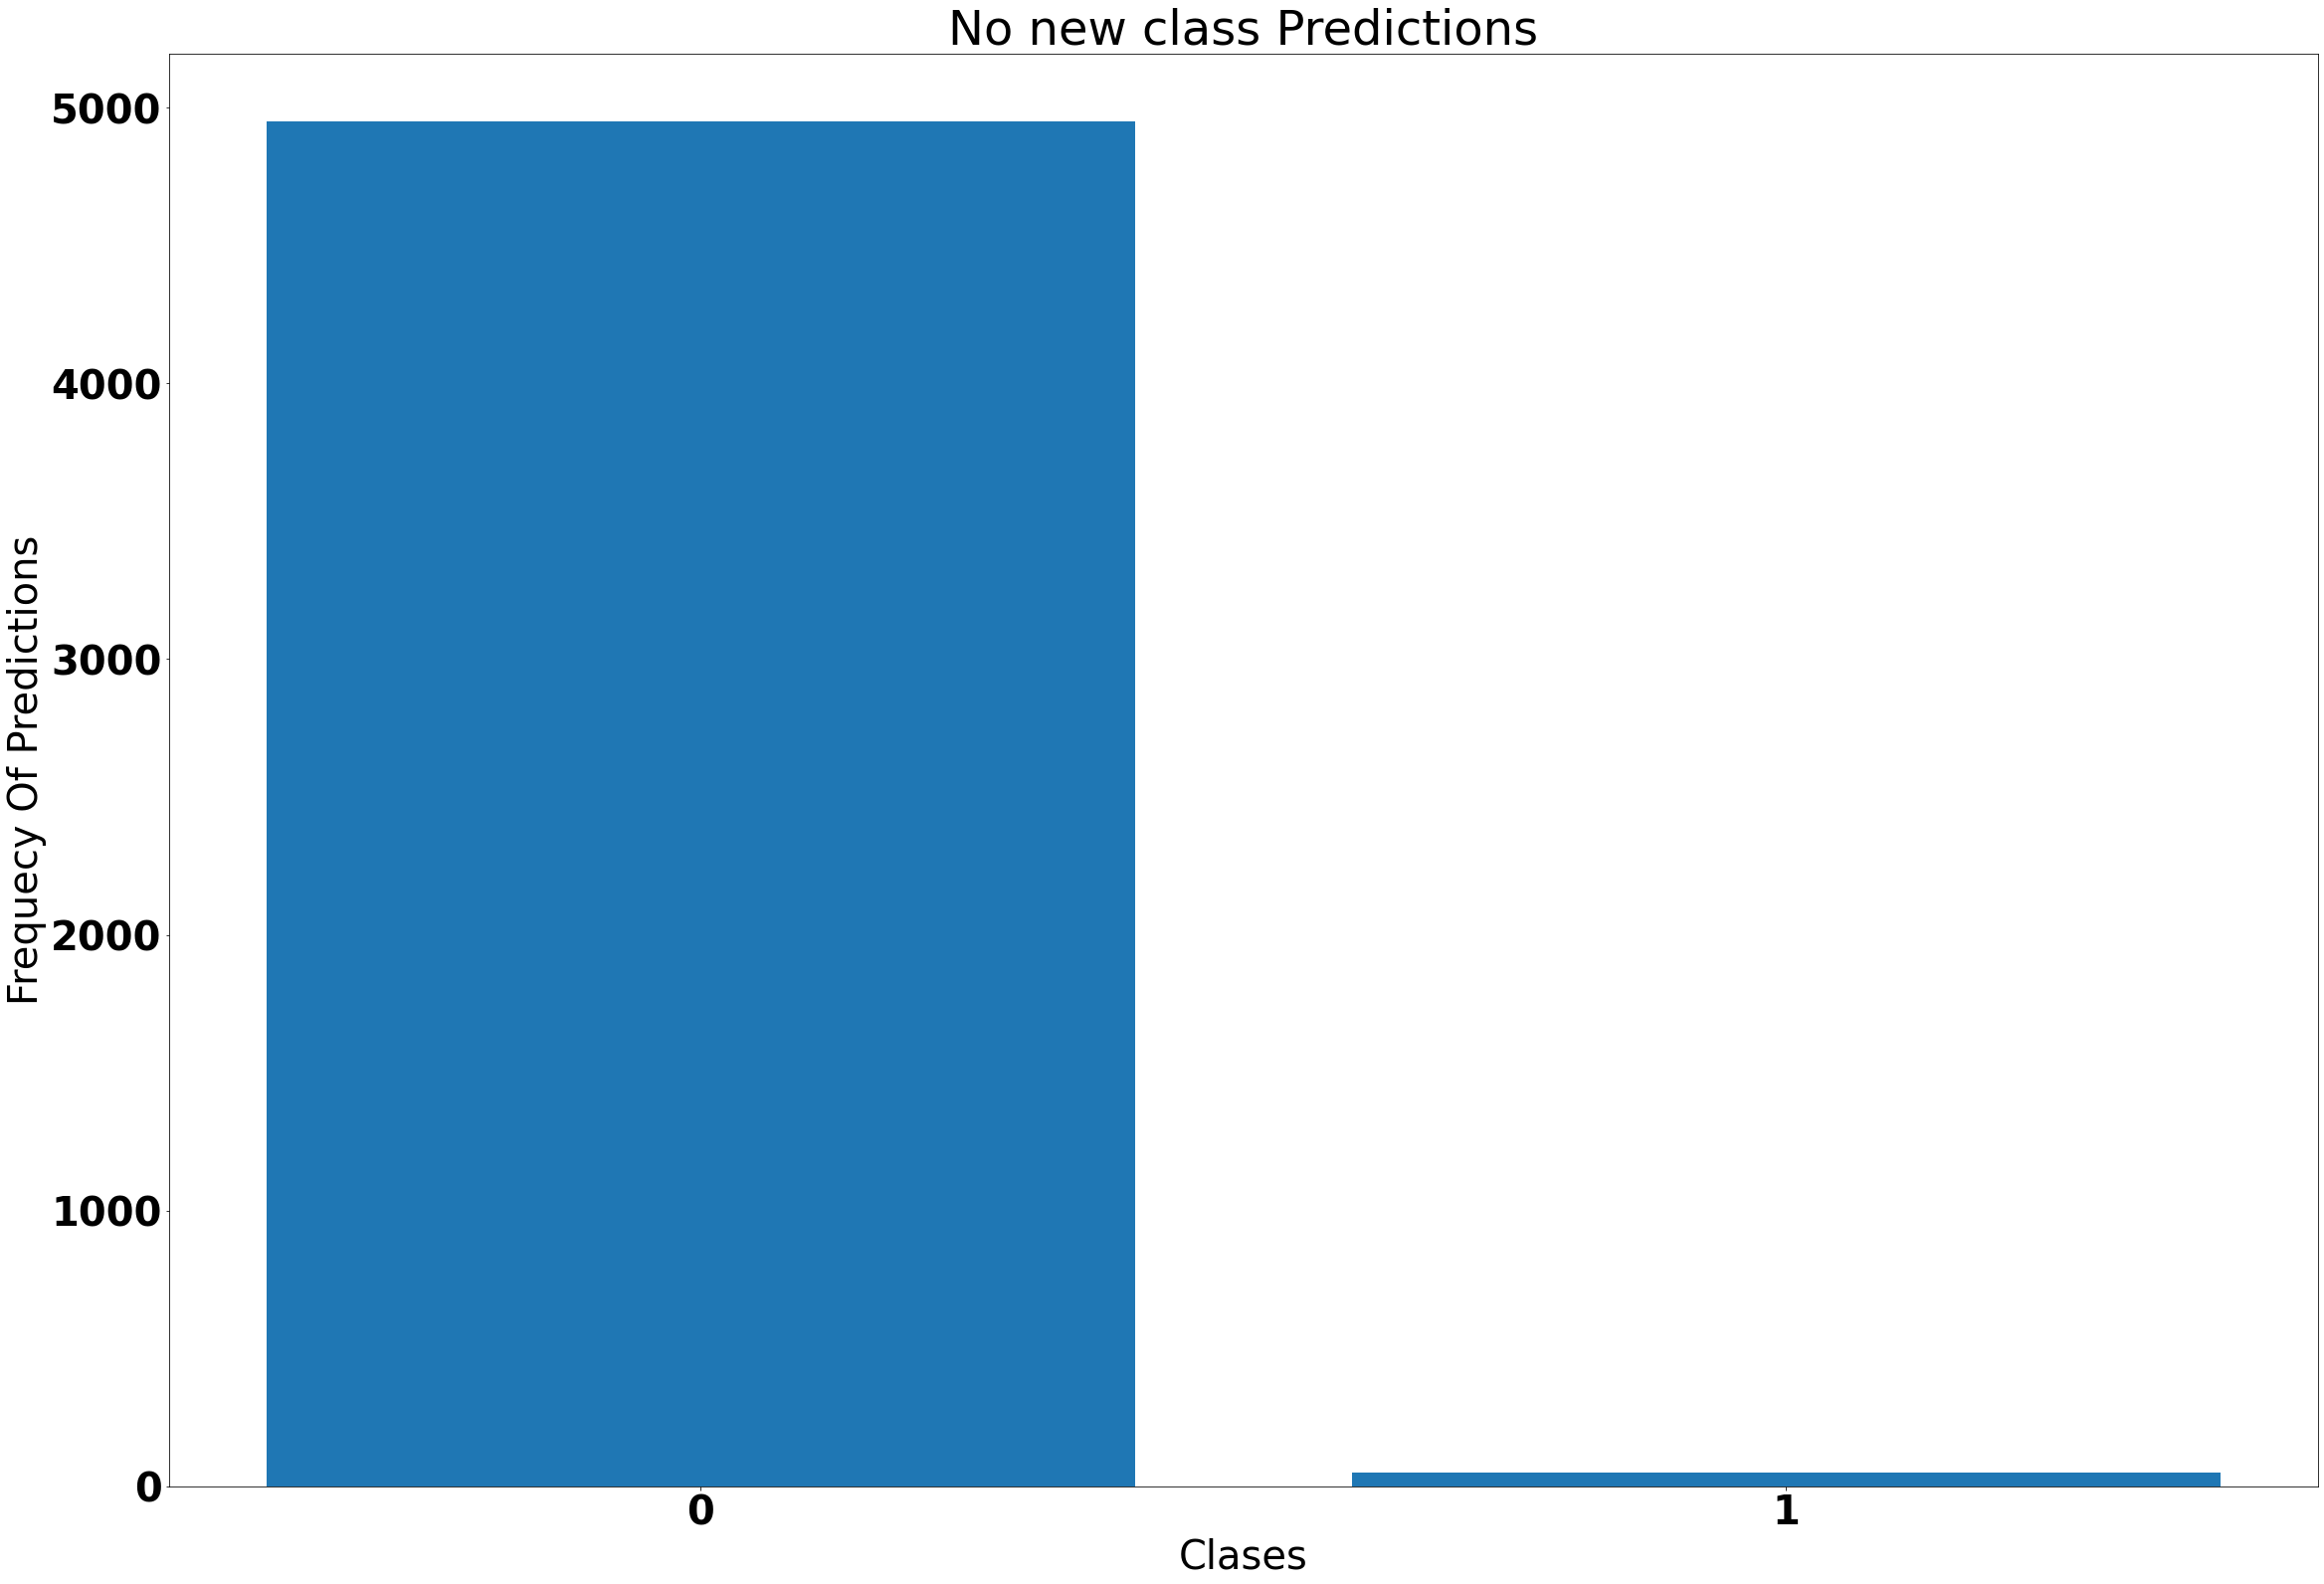

In [37]:
idx = 0
c = [i for i in range(len(bin_testY)) if(bin_testY[i]==idx) ]
plot_class_predictions(pred[c],idx, labels_names)

Class #1


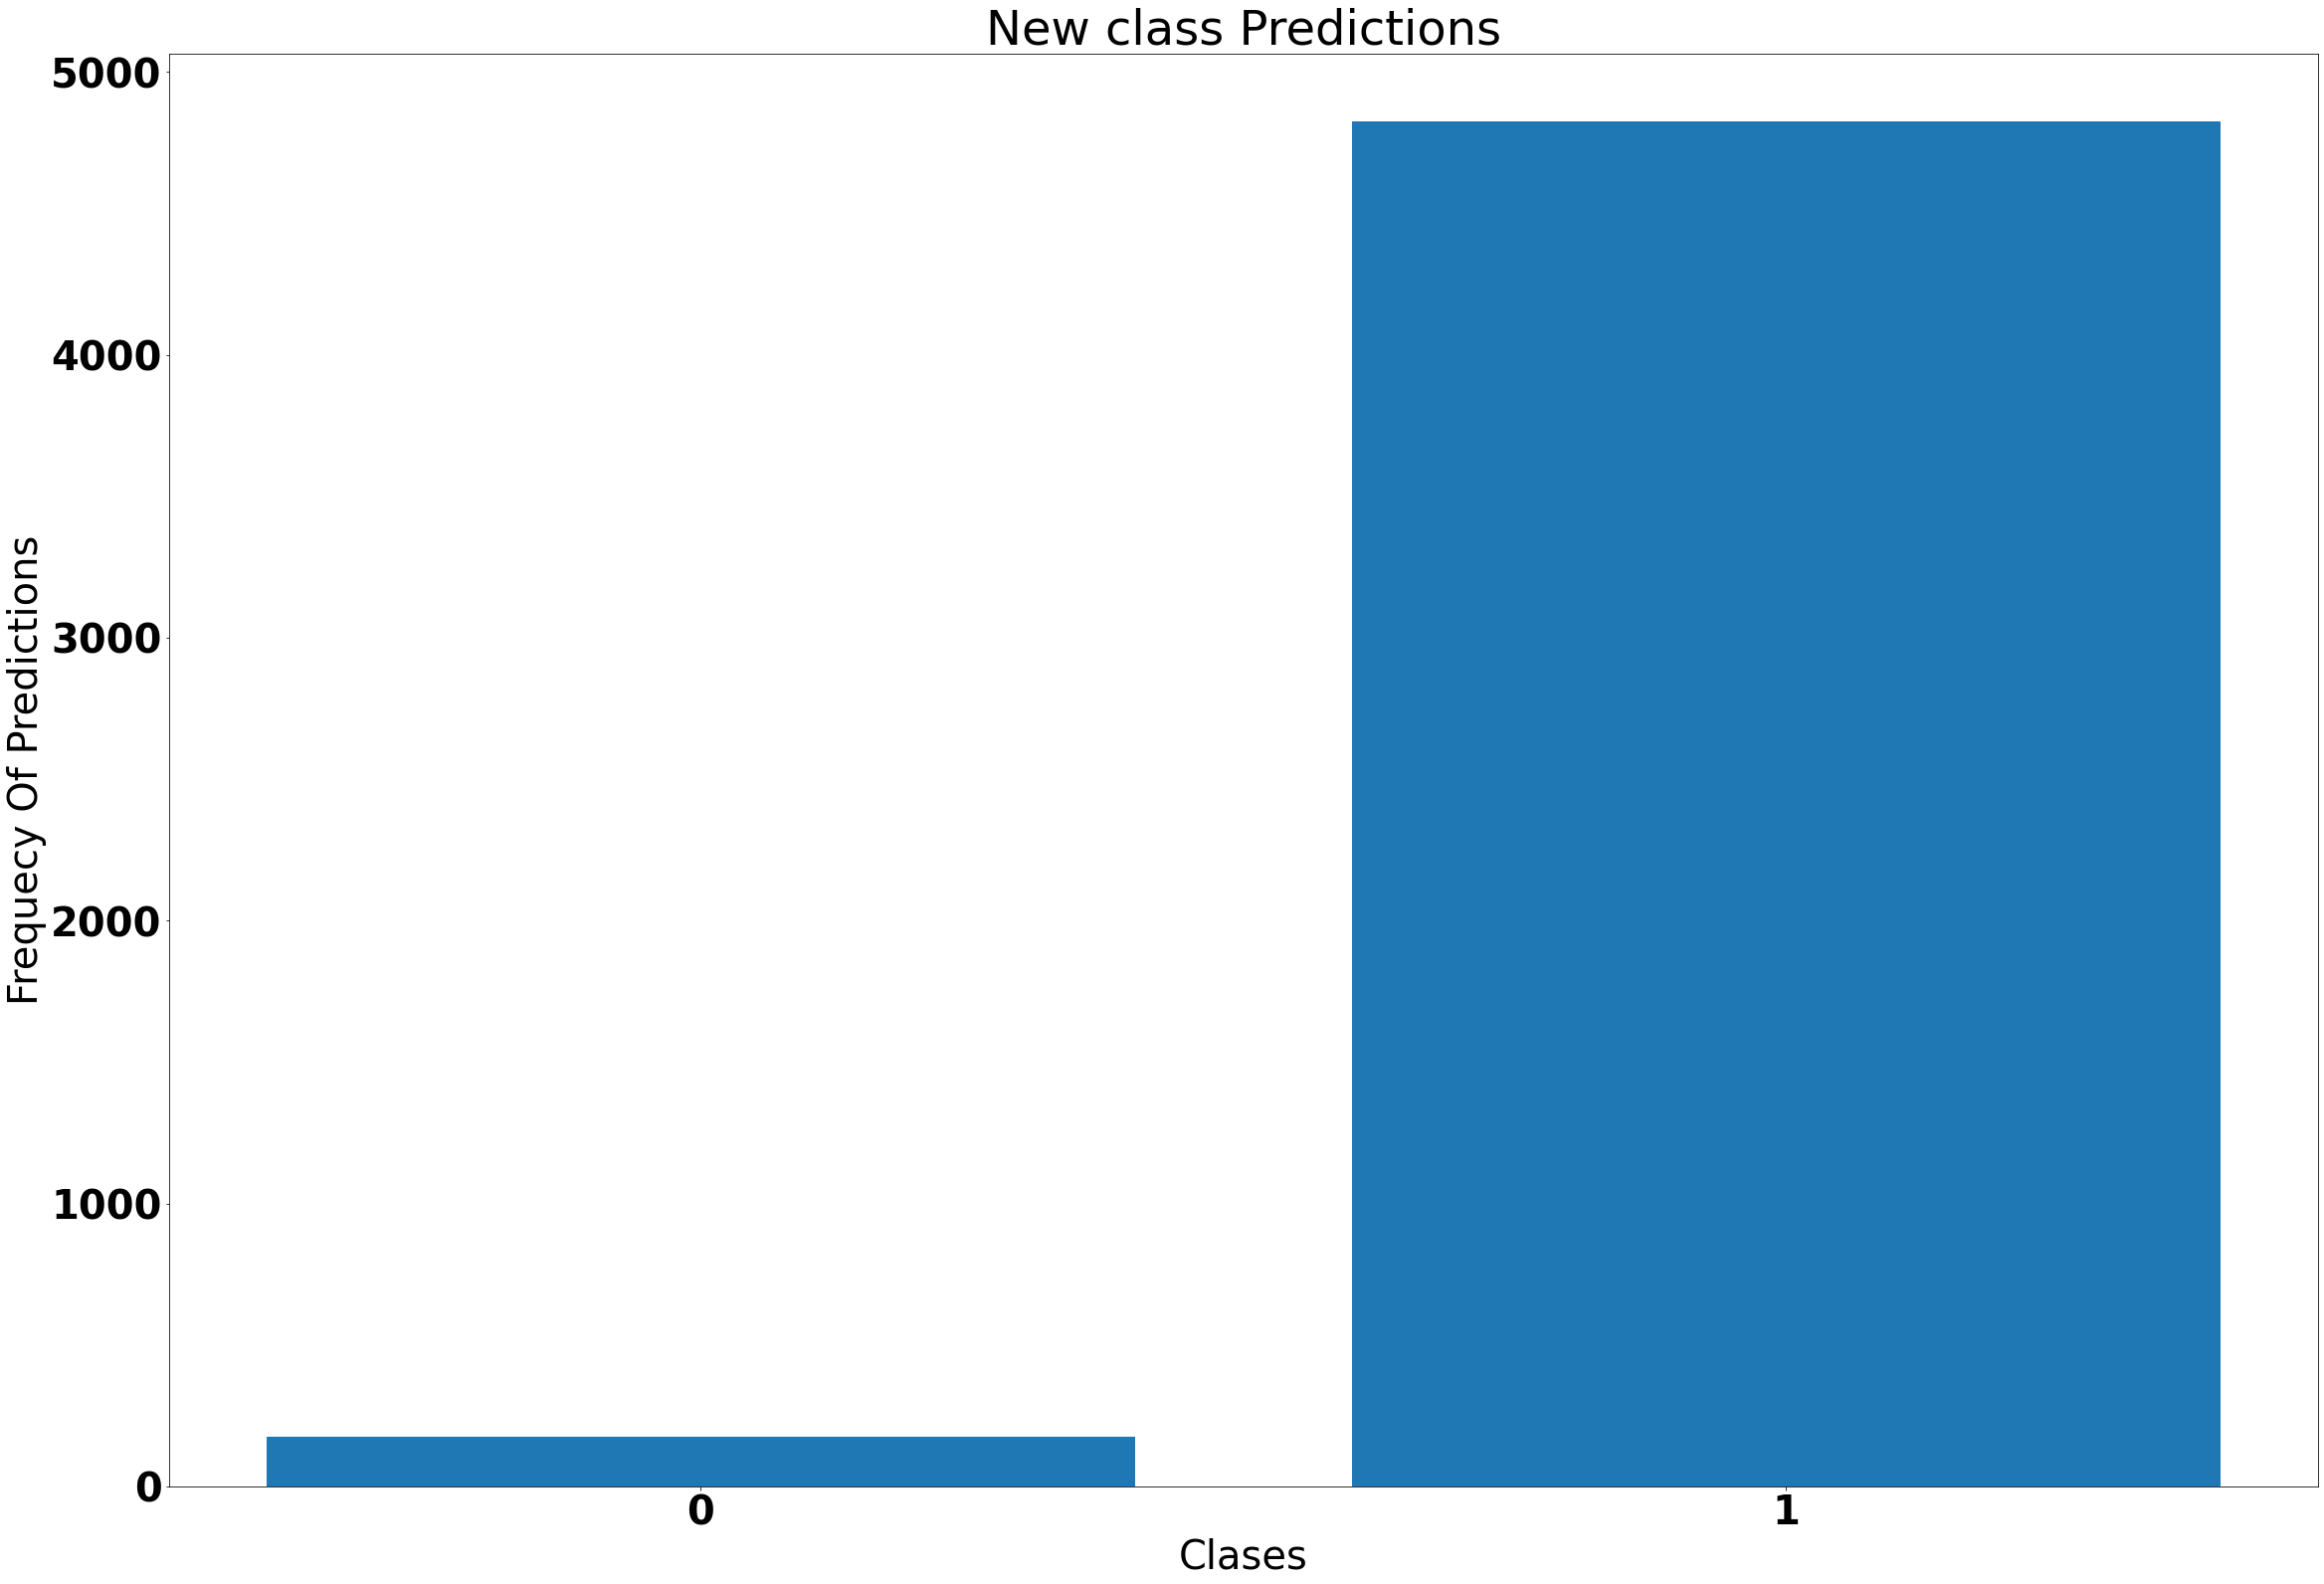

In [38]:
idx = 1
c = [i for i in range(len(bin_testY)) if(bin_testY[i]==idx) ]
plot_class_predictions(pred[c],idx, labels_names)